Regression is where a model predicts a number

We'll then split this data sample into two subsets:
- A training dataset - To which we'll apply an algorithm that determines a function (f(x)=y) encapsulating the relationship between the feature values and the known label values
- A validation or test dataset - We can use to evaluate the model by using it to generate predictions for the label and copmaring them to the actual known label values

Residuals is the difference between the predicted value and the observed value.
Some oy the metrics we can use to evaluate how well the model predicts
  - Mean Squared Error(Its not expressed in a meaningful unit of measurement). Its useful metric to compare two models and fing the one that performs best.
  - Root Mean Squared Error(RMSE) - its more useful to express the loss in the same unit of measurement as the predicted label value itself, in this case the number of rentals.
  
RMSE = 3.13 - I t indicates the loss is just over 3, which you can interpret as loosely that on average incorrect predictions are wrong by around 3 rentals

There are many other metrics that can be used to measure loss in a regression
 - R2(R-Squared) or Coefficients of determination - Is the correlation between x and y squared
 It produces a value between 0 and 1 
 It measures the amount of variance that can be explained by the model, the closer this value is to 1, the better the model predicts

### Train and evaluate machine learning models

There are a lot of machine learning algorithms for supervised learning, and they can be broadly divided into two types
- Regression algorithms: Algorithms that predict a y value that is numeric value
- Clssification algorithm- Algorithm that predicts to which category, or class an observation belongs



  #### Explore the Data
  
 The first step in any machine learnimg project is to explore the data that you will use to train the model 
 The goal of this exploration is to try to understand the relarionship between its attributes; in particular any apparent correlation between the features and the label your model will try to predict
 This reqiure some work to detect and fix some issues in the data such as:
 
   - Dealing with missing values,errors,or outliers
   - Deriving new feature columns by transforming or combining existing features - A process known as feature engineering
   - Nornalizing numeric features so that they are on the same scale
   - Encoding categorical features as numeric indicators

In [1]:
# Lets start by loading the bicycle sharing data as a Pandas DataFrame
import pandas as pd

bike_data = pd.read_csv("daily-bike-share.csv")
bike_data.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [2]:
bike_data.columns

# Rentals represent the label(the value y) ourmodelmust be trained to predict
# The other columns are potential features(x values)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals'],
      dtype='object')

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [4]:
# We can perform some feature engineering to combine or derive new features
# i.e Lets add a new column named day to dataframe by extracting the day components from the existing dteday column.The column represents the day of the month from 1 to 31

bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


Lets start our analysis of the data by examining a few key descriptive statistics

We can use dataframes's describe method to generate these for the numeric fearutes

In [5]:
numeric_features = ['temp','atemp','hum','windspeed']

bike_data[numeric_features + ['rentals']].describe()

# The mean number of daily rentals is around 848
# But there is comparatively large standard deviation, indicating a lot of variance in the number of rentals per day

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


We might get a clearer idea of the distribution of rentals values by visualizing the data.
Common type for visualizing numeric data distribution are histograms and box plots

<ipython-input-6-3851f7e72904>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


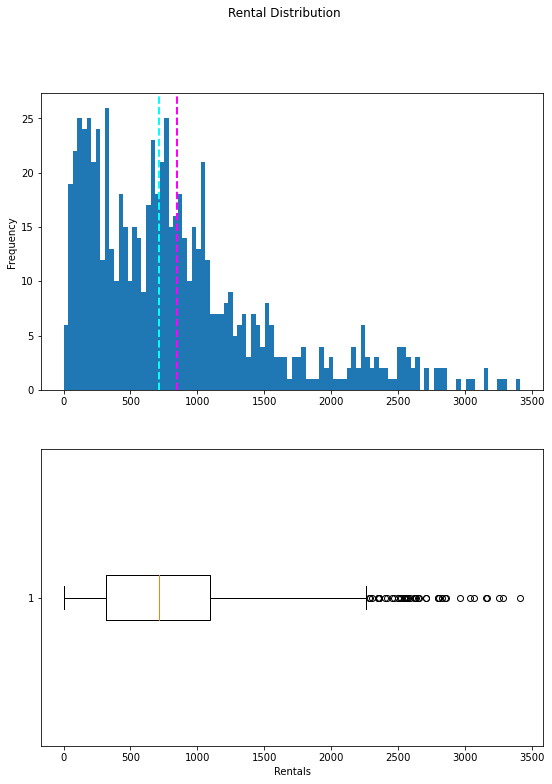

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column

label = bike_data['rentals']

# Create a figure for 2 subplots(1 column and 2 rows)

fig,ax = plt.subplots(2,1,figsize = (9,12))

# Plot a histogram
ax[0].hist(label,bins = 100)
ax[0].set_ylabel('Frequency')

# Add lines for mean, median and mode
ax[0].axvline(label.mean(),color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax[0].axvline(label.median(),color = 'cyan', linestyle = 'dashed', linewidth = 2)

# Plot the boxplot

ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Rentals')

# Add a title to the figure
plt.suptitle('Rental Distribution')

# Show the figue
fig.show()

The plot show that the number of dialy rentals ranges from 0 to just over 3400.
However, the mean and the mwdian number of the rentals is closer to the low end of the range, with most of the data between 0 ansd around 2,200 rentals
The rentals has outliers( Unusually low or high values beyond the typical range of most of the data)

We can do the same kind of visual exploration of the numeric features

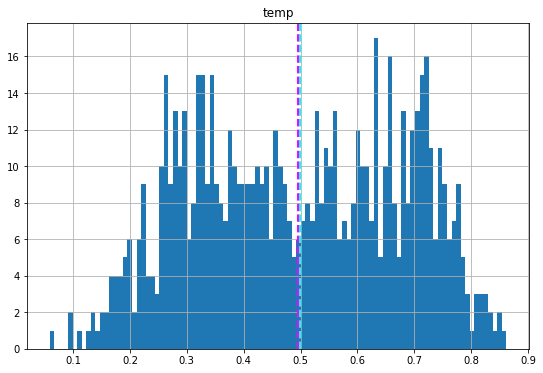

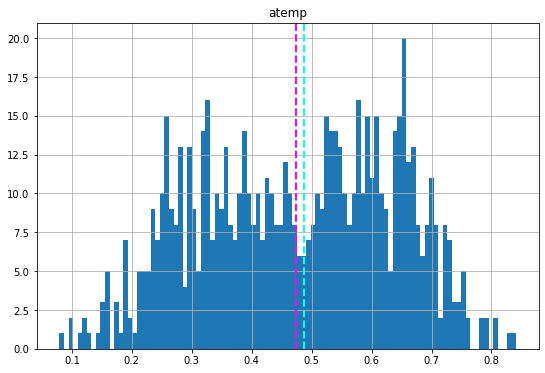

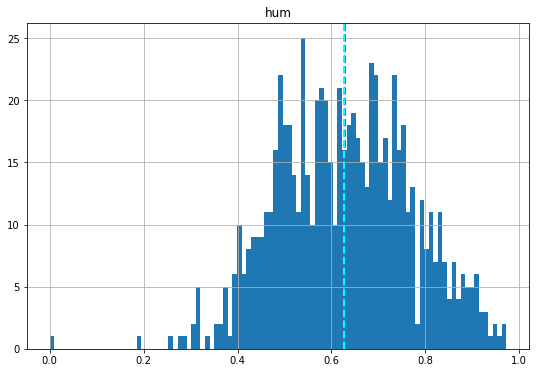

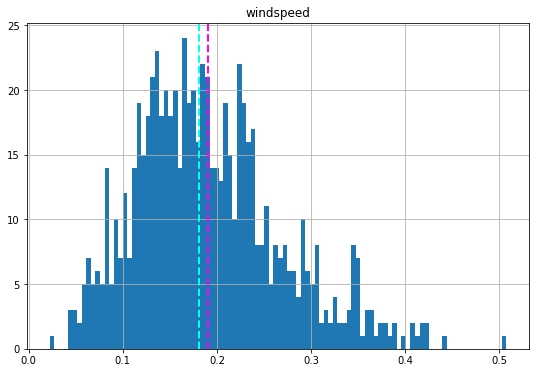

In [7]:
# lets create a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(),color = 'magenta', linestyle= 'dashed',linewidth=2)
    ax.axvline(feature.median(),color = 'cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric features seem to be normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occuring values are

##### For categorical features( these are'nt continuos numbers on a scale) so we can't use a histogram but we can plot a bar chart showing the count of each discrete value for each category

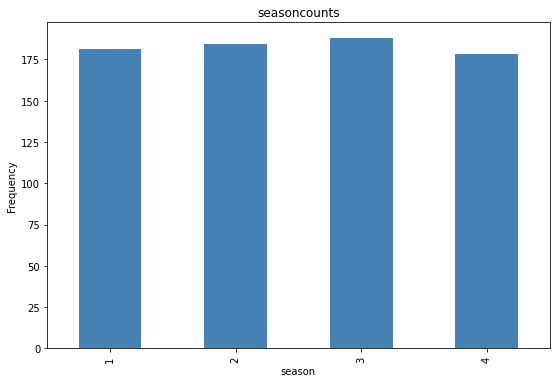

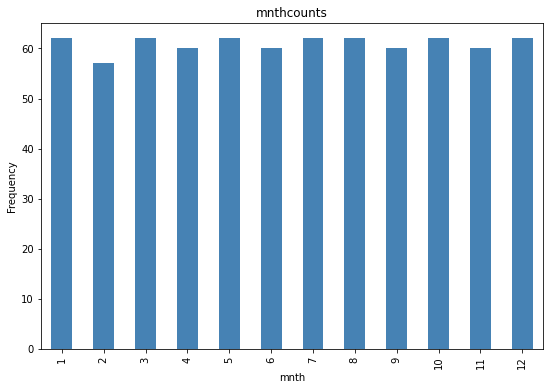

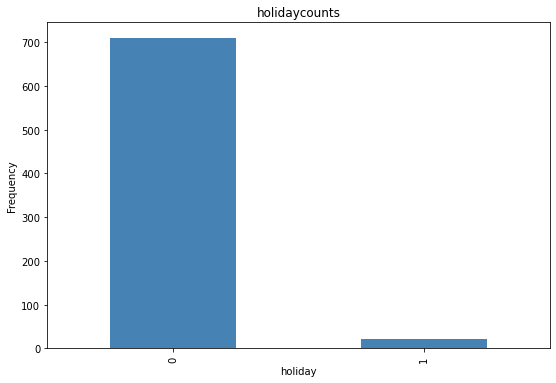

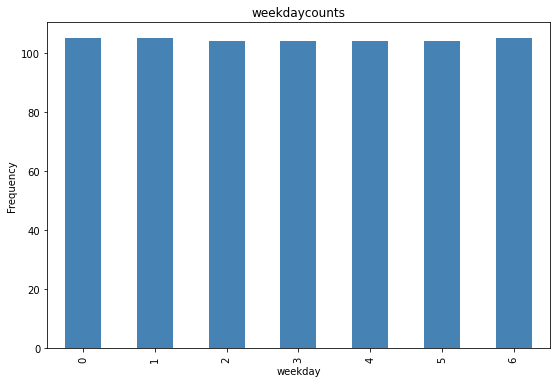

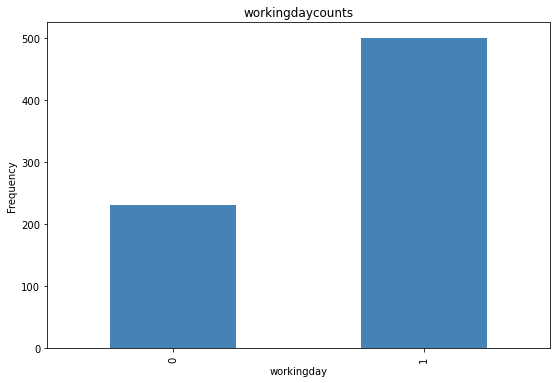

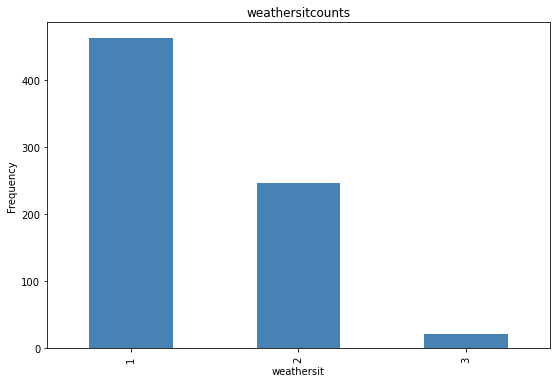

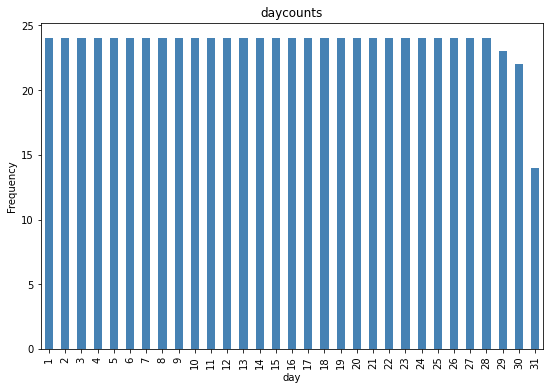

In [8]:
import numpy as np

# Plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + 'counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()
    

- Most categorical variables show a more or less uniform ditribution(Meaning there is rougly the same number of rows in each category)
- Exceptions to this:
    1. holiday- There are fewer days that are holidays than days that aren't
    2. workingdays
    3. weathersit - no category 4 at all

#### We can start to look at the relationship between the fearures and the rental label we want to be able to predict
For numeric features, we can create a scatter plot that shows the intersection of feature and labels
We can  also create the correlation statistic to quantify the apparent relationship

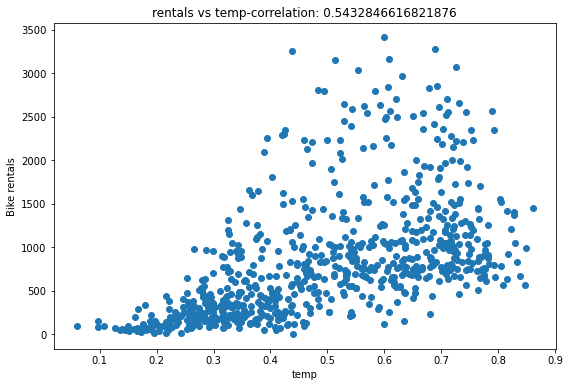

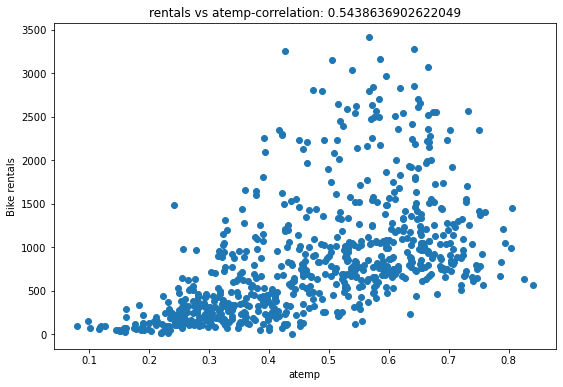

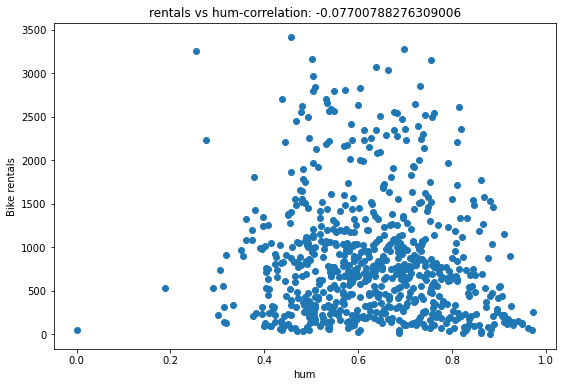

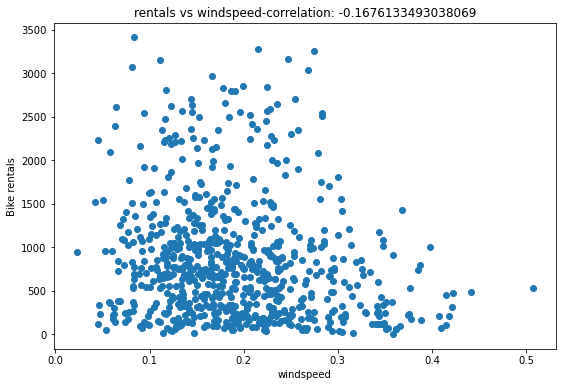

In [9]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x = feature,y = label)
    plt.xlabel(col)
    plt.ylabel('Bike rentals')
    ax.set_title('rentals vs ' + col + '-correlation: ' + str(correlation))
plt.show()

The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

#### Now lets compare the categorical features to the label.
We will create a box plot that shows the distribution of rental counts for each category


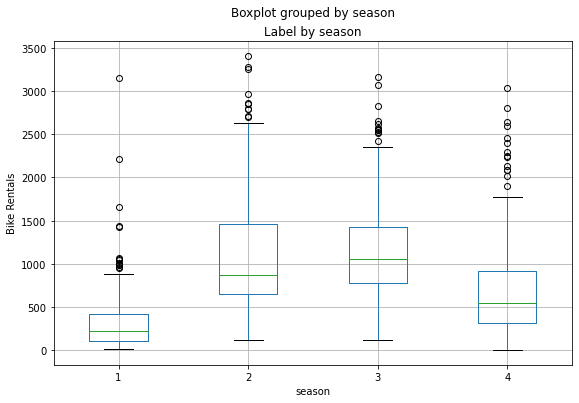

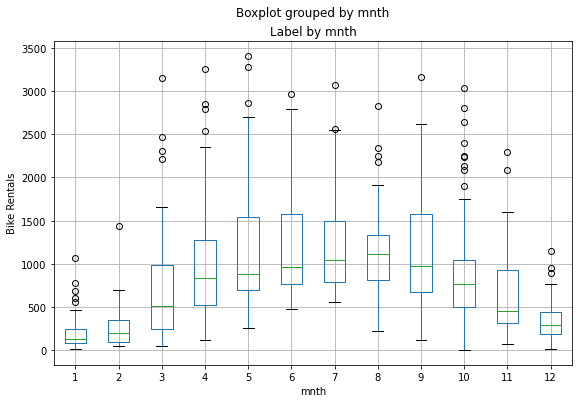

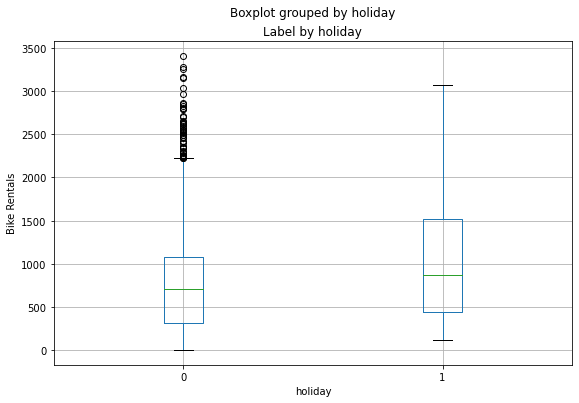

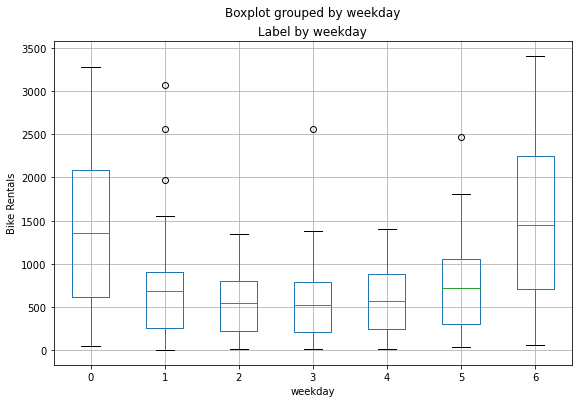

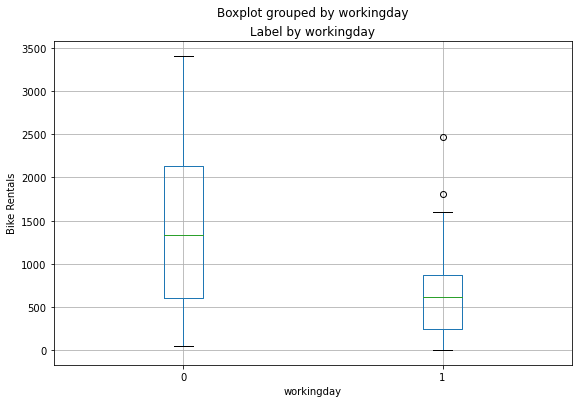

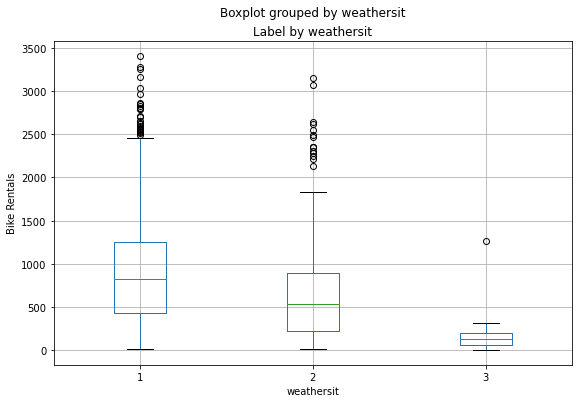

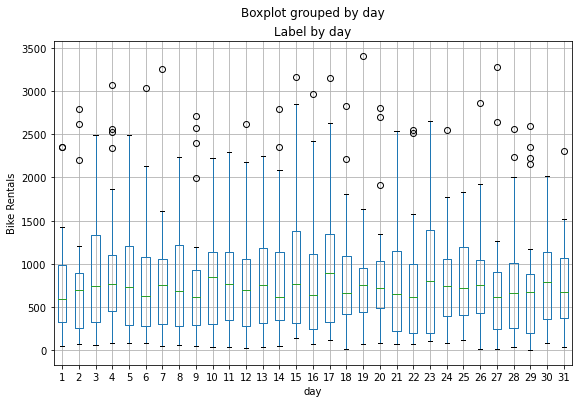

In [10]:
# plot a box plot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col,ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel('Bike Rentals')
plt.show()

The day feature for the day of the month shows little variation, indicating that its probably not predictive of the number of rentals
The other plots show some variance in the relationship between some category values and rentals

## Train a Regression Model

The first thing we need to do is to separate the features we want to use to train a model from the label we want to predict

In [11]:
# Separate features and labels

x,y = bike_data[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values,bike_data['rentals'].values
print('Features:',x[:10], '\nLabels:', y[:10],sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

After separating the dataset,we now have numpy arrays named x containing features,and y containing labels


- To randomly split the data,we will use the train_test_split function in the scikit-learn library

- The library is one of the most widely used machine learning packages for Python

In [12]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print('Training Set: %d rows \nTest Set: %d rows' %(X_train.shape[0],X_test.shape[0]))

Training Set: 511 rows 
Test Set: 220 rows


We will use a linear regression algorithm

In Scikit-Learn, training algorithm are encapsulated in estimators, and in this case we'll use the **LinearRegression** estimator to train a linear regression model

In [13]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


### Evaluate the Trained Model

In [14]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ',np.round(predictions)[:10] )
print('Acttual labels :', y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Acttual labels : [2418  754  222   47  244  145  240  555 3252   38]


We can create a scatter plot that compare the predicted values and the actual values.We'll also overlay a trend line to get a general sense for how the predicted labels align with the true labels

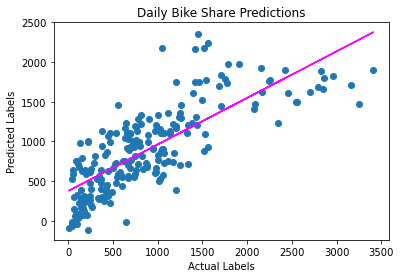

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# Overlay the regression line
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

You can quantify the resuduals by calculating a number of commonly used evaluation metrics.
We will focus on the following three:
- Mean Square Error(MSE)
- Root Mean Square Error(RMSE)
- Coefficient of Determination(R-squared or R2)

In [16]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,predictions)
print("MSE:",mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

r2 = r2_score(y_test,predictions)
print('R2:',r2)

MSE: 201972.55947035577
RMSE: 449.4135728595163
R2: 0.6040454736919193


## Experimenting with models

Regression models are often chosen because they work with small data samples, are robust,easy to interpret, and a variety exists

- Linear regression
- Decision trees- They take a step-by-step approach to predicting a variable
- Ensemble algorithms - They construct not just one decision tree, but a lagre number of trees - allowing better predictions on more complex data

Ensemble algorithms such as **Random Forest** are widely used in machine learnimg and science due to there strong abilities.

Data scients often experiement with different models.

In [18]:
# Importing modules we will need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Load the training dataset
bike_data = pd.read_csv('daily-bike-share.csv')

# Create day column-Feature Enginnering

bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numerical_features = ['temp','atemp','hum','windscreen']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']
bike_data[numeric_features+['rentals']].describe()
print(bike_data.head())

# Separeate the features with labels
# After we have separated we know have a nmpy array named **X** containing features, and **y** containing labels
X,y = bike_data[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values,bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print('Training Set:%d rows\nTest Set: %d rows' %(X_train.shape[0],X_test.shape[0]))

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set:511 rows
Test Set: 220 rows


#### Experiment with Algorithms

- Linear algorithms(The one we used above is technically an Ordinary Least Squares Algorith, we have other variants such as Lasso and Ridge
- Tree-based algorithms
- Ensembe algorithms

Lasso() 

MSE: 201155.70593338402
RMSE: 448.5038527519959
R2: 0.605646863782449


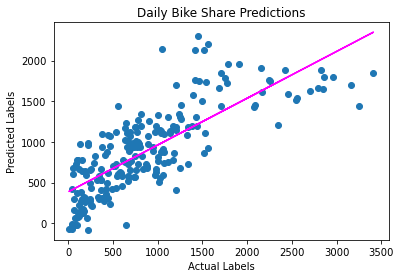

In [21]:
# Lets try training our algorithm by using Lasso algorithm. 
# We cn do so by just changing the estimator in the training code

from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train,y_train)
print(model, "\n")

# Evaluate the model using test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
r2 = r2_score(y_test,predictions)
print("R2:",r2)

# Plot predicted vs actual

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# Overlay the regression line
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color = 'magenta')
plt.show()

### Try a Decision Tree Algorithm

- As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based appoach in which the features in the datasets are examined in a series of evaluations, each of which results in a branch in a decision tree baed on the feature value.
- At the end of each series of branches are leaf-nodes with the predicted label value based on the feature value

In [23]:
# The code will print the model definition and a text representation of the tree it uses to predict label values

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model 

model = DecisionTreeRegressor().fit(X_train,y_train)
print(model,"\n")

# Visualize the model Tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_7 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_7 >  0.26
|   |   |   |   |   |   |--- feature_8 <= 0.36
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_8 >  0.36
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_8 <= 0.37
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_8 >  0.37
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |   |--- val

MSE: 258479.2
RMSE: 508.4084971752538
R2: 0.49326775149614654


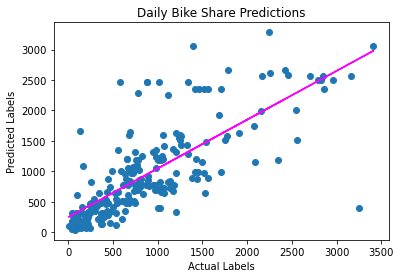

In [24]:
# Lets evaluate the model with the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse = np.sqrt(mse)
print('RMSE:',rmse)
r2 = r2_score(y_test,predictions)
print("R2:",r2)

# Plot the predicted vs Actual
plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
          
# Overlay the regression line
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color = 'magenta')
plt.show()
        
          



The tree based model doesn't seem to have imprived over the linear model

#### Try an Ensemble Algorithm

Ensemble algorithm work by combining multiple base estimators to produce an optimal model,either by applying an aggregate finction to a collection of base models(sometimes referred to as **bagging**) or by building a sequence of models that bulid on one another to improve predictive performance(referred to as **boosting**)

RandomForestRegressor() 

MSE: 109664.88073772728
RMSE: 331.15688236503144
R2: 0.7850088842810738


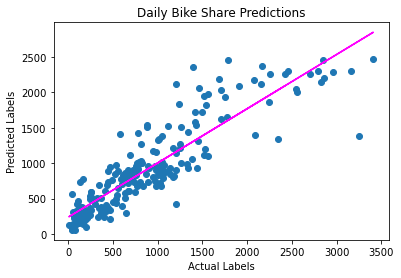

In [25]:
# Let's try Random Forest Model which applies an averaging function to multiple Decision Tree models for a better overall model

from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train,y_train)
print(model,"\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


For good measure, lets also try a **boosting ensemble algoruthm**. We will use a Gradient Boosting estimator,which like Random Forest algorith builds multiple trees,but instead of building them all independently and taking the average result,each tree is built on the outputs of the prevoius one in an attempt to incremently reduce the loss(error) in the model

GradientBoostingRegressor() 

MSE: 104215.41748874327
RMSE: 322.8241277983157
R2: 0.7956922149525428


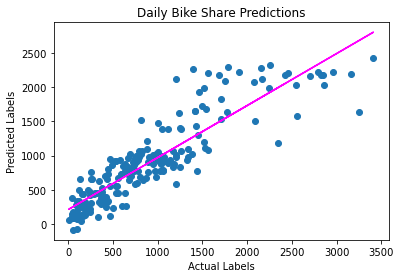

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model

model = GradientBoostingRegressor().fit(X_train,y_train)
print(model,"\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Improve models with hyperparameters

Simple models with small datasets can often be fit in a single step,wkile larger datasets and more complex models must be fit by repeatedly using the model with training data and comparing the output with the expected label.If the prediction is accurate enough, we consider the model trained. If not,we adjust the model slightly and loop again.

**Hyperparameters** are values that change the way that model is fit during these loops.
**Learning rate** for example is hyperparameter that sets how much a model is adjusted during each training cycle.A high learning rate means a model can be trained faster, but if it's too high the adjustments can be so large that the model is never "finely tuned" and not optimal

#### Preprocessing data
- It refers to changes you make to your data before it is passed to the model. 
It can involve cleaning your dataset, or changing the format of your data, so its easier for your model to use

- **Scaling features**. The most common preproceccing step is to scale features so they fall between zero and one

- **Using categories as features**. You can use **one-hot vectors**-vectors that have a 0 or 1 for each possible value

## Optimize and save models 

In [28]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


GradientBoostingRegressor() 

ME: 104191.99151258658
RMSE: 322.7878428822662
R2: 0.7957381401084984


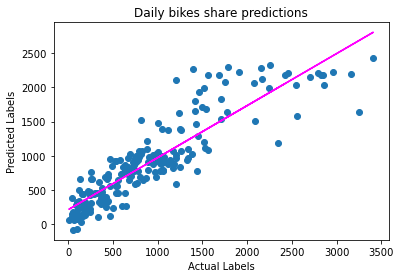

In [34]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Fit a lasso models on the training set
model = GradientBoostingRegressor().fit(X_train,y_train)
print(model,'\n')

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print('ME:',mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
r2 = r2_score(y_test,predictions)
print("R2:",r2)

# Plot the predicted vs actual
plt.scatter(y_test,predictions)
plt.xlabel("Actual Labels")
plt.ylabel('Predicted Labels')
plt.title('Daily bikes share predictions')

# Overlay the regression line
p = np.polyfit(y_test,predictions,1)
z = np.poly1d(p)
plt.plot(y_test,z(y_test),color = 'magenta')
plt.show()

### Optimize Hyperparameters

In machine learning, the term **parameters** refer to values that can be determined from data.
Values that you specify to affect the behavior of a training algorithm are correctly referred to as **hyperparameters**

The specific hyperparameters for an estimator vary based on the algorithm that the estimator encapsulates. In the case of the **GradientBoostinRegressor** estimator, the algorithm is an ensemble that combine decision trees to create an overall predictive model.
You can learn about the hyperparameters for this estimator in the **Scikit-Learn documentation**

Hyperparameters work together to effect the way the algorithm trains a model. In many cases the default values provided by Scikit-Learn will work well: but there may be some advantage in modifying hyperparameters to get better predictive performance or reduce training time.

So how do you know what hyperparameter values you should use? 

In absence of deep understanding of how the underlying algorithms works, you'll need to experiment.
Scikit-Learn provides a way to tune hyperparameters by trying multiple combinatins and finding the best result for a given perfomance metric

Let's try a grid search approach to try combinations from a grid of possible values for the **learning_rate** and **n_estimators** hyperparameters of the **GradientBoostingRegressor** estimator


Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 108896.04666482464
RMSE: 329.9940100438562
R2: 0.7865161352261724


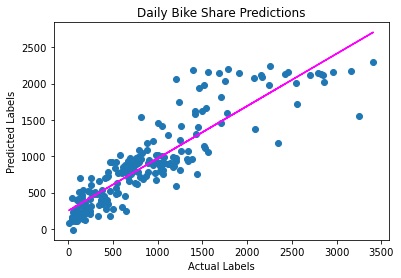

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

# Use a Gradient Boosting algorithms
alg = GradientBoostingRegressor()
# Try these hyperparameter values
params = {
    'learning_rate':[0.1,0.5,1.0],
    'n_estimators':[50,100,150]
}

# Find the best hyperparameter combination to optimize the R2 metric

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg,params,scoring=score,cv=3,return_train_score=True)
gridsearch.fit(X_train,y_train)
print("Best parameter combination:",gridsearch.best_params_,"\n")

# Get the best model
model = gridsearch.best_estimator_
print(model,"\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
r2 = r2_score(y_test,predictions)
print("R2:",r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


### Preprocess the Data
There's is a huge range of preprocessing transformations you can perform to get ready for modelling, but we'll limit ourselves to a few common techniques:
    
- Scaling Numeric features.It prevents features with large values from producing coefficients that disproportinately affect the predictions. There are multiple ways you can scale numeric data:
        - Calculating the minimum and maximun values for each column and assigning a proportional value between 0 and 1
        - Using the mean and standard deviation of a normally distributed variable to maintain the same spread of values on a different scale
 - Encoding categorical variables. Involves converting categorical features into numeric representations.
         - one-hot encoding
        
        

To apply these preprocessing transformations to the bike rentals, we'll make use of a Scikit-Learn feature named **pipelines**. 

These enables us to define a set of preprocessing steps that end with an algorithm.You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm.This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations(based on the same statistical distributions and category encodings used with the training data)
    

In [38]:
# Train the model

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Define preprocessing for numeric columns
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())])

# Define preprocessing for categorical features(enode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)])

# Create preprocessing and training pipeline 

pipeline = Pipeline(steps=[('preprocessor',preprocessor),('regressor',GradientBoostingRegressor())])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train,(y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


The model is trained, including the prepocessing steps.Let's now see how it performs with the validation data.

MSE: 105850.67649596585
RMSE: 325.3470093545749
R2: 0.792486392303695


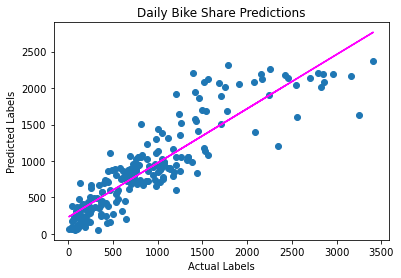

In [39]:
# Get predictions

predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

To try an alternative algorithm we can just chage that step to a different kind of estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 105697.40743681816
RMSE: 325.1113769722895
R2: 0.7927868666744295


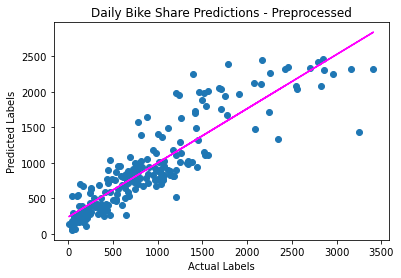

In [45]:
# Use a different estimator in the pipeline

pipeline = Pipeline(steps=[('preprocessor',preprocessor),('regressor',RandomForestRegressor())])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train,y_train)
print(model,"\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

We've seen a number of common techniques used to train predictive models for regression. In a real project, you'd likely try a few more algorithms, hyperparameters, and preprocessing transformations.

We'll explore how one can use the trained model with the new data

#### Use the Trained Model

In [46]:
# let's first save the model
import joblib

# Save the model as a pickle file
filename = './bile-share.pkl'
joblib.dump(model,filename)


['./bile-share.pkl']

Now we can load it whenever we need it, and use it to predict labels for new data. This is often called *scoring* or *inferencing*

In [47]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation(for example tomorrow's seasonal and weather forecast information)

X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 97 rentals


The models **predict** method accepts an array of observations, so you can use it to generate multiple predictions as a batch.

For example,suppose you have a weather forecast for the next five days: you can use the model to predict bike rentals for each day based on the expected weather conditions.

In [48]:
# An array of featuers based on five-day weather forecast

X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))



5-day rental predictions:
560.0
737.0
280.0
246.0
309.0


## Challenge: Predict Real Estate Prices

Think you're ready to create your own regression model? Try the challenge of predicting real estate property prices in the 02 - Real Estate Regression Challenge.ipynb notebook